### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table
- We are going to create an accuracy table for each model separately


### 

# Task 1: Importing libraries and Exploring the Dataset.

- Before jumping on to displaying the dataset we are working with initially we need various libraries to be imported for designing a code that performs training and testing tasks, Predictions, array operations and so on, they are as follows

In [1]:
# Importante Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import joblib
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

- Now that we have our libraries the 1st step is to look at the data we’re working with. Realistically, most of the data we will get, even from the government, can have errors, and it’s important to identify these errors before spending time analyzing the data. Normally, we must answer the following questions:
1. Do we find something wrong in the data ?
2. Are there ambiguous variables in the dataset ?
3. Are there variables that should be fixed or removed ?
- Let’s start by reading the data using the function read.csv() and summarize both datasets:

In [4]:
# Read The Dataset
data = pd.read_csv('../dataset/loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print('Column Names :\n', data.columns)

Column Names :
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


- Shape function will show us how many rows and columns in the dataset

In [6]:
data.shape

(614, 13)

#### 

# Task 2: Definining Exploratory Data Analysis with an overview of the whole project 
###

- Here we will show some statistics about numerical attributes (columns) using describe()

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns).

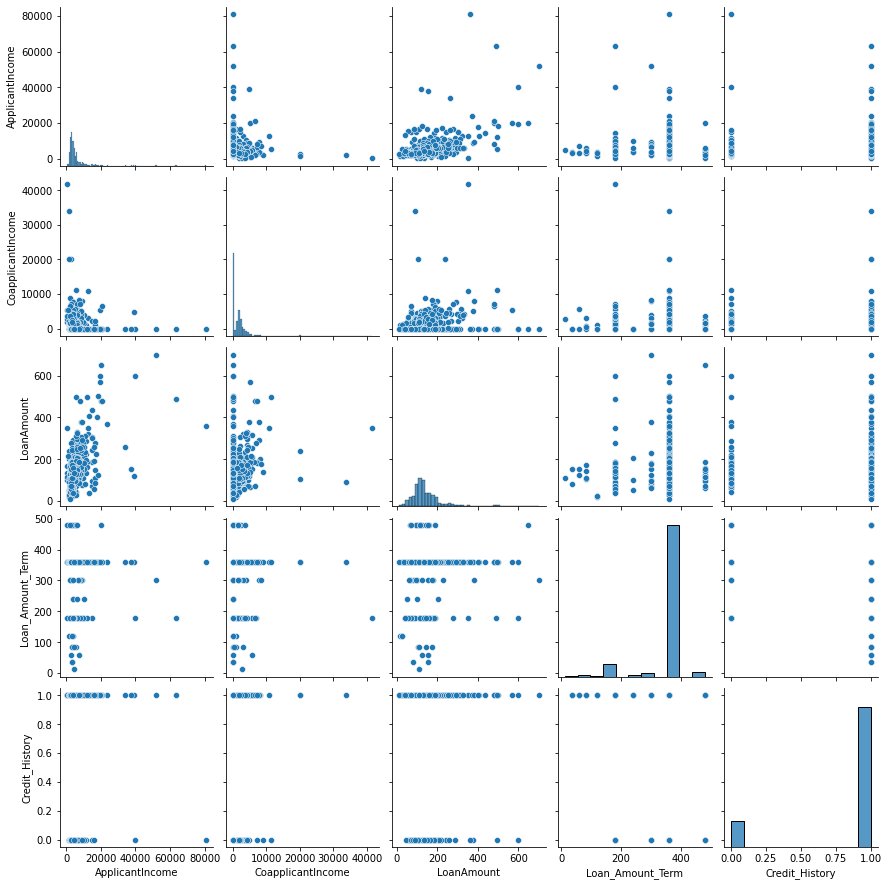

In [8]:
sns.pairplot(data)

#### Data Visualization using piechart and countplot for categorical attributes (columns).

<AxesSubplot:title={'center':'Gener'}>

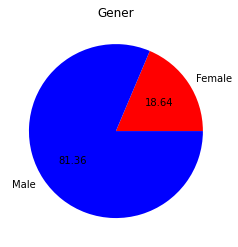

In [9]:
data.groupby('Gender').size().plot(kind='pie', autopct='%.2f', colors=['red', 'blue'], title="Gener")

<AxesSubplot:title={'center':'Dependents'}>

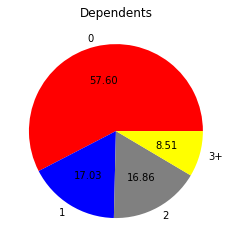

In [10]:
data.groupby('Dependents').size().plot(kind='pie', autopct='%.2f', colors=['red', 'blue', 'gray', 'yellow'], title="Dependents")

<AxesSubplot:title={'center':'Married'}>

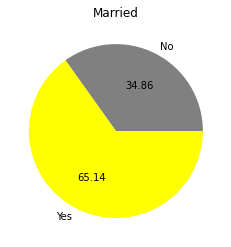

In [11]:
data.groupby('Married').size().plot(kind='pie', autopct='%.2f', colors=['gray', 'yellow'], title="Married")

<AxesSubplot:xlabel='Education', ylabel='count'>

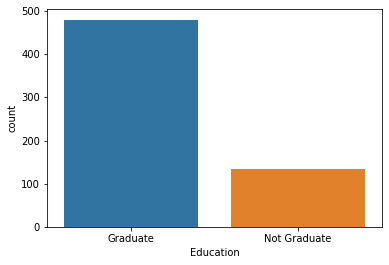

In [12]:
sns.countplot(x='Education',data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

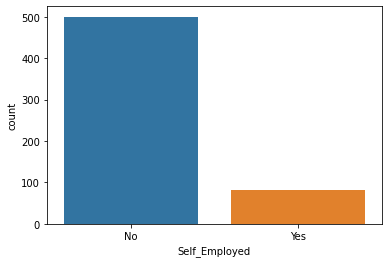

In [13]:
sns.countplot(x='Self_Employed',data=data)

<AxesSubplot:title={'center':'Property_Area'}>

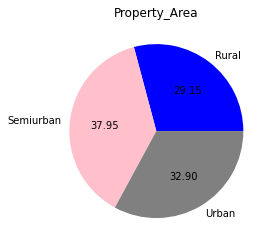

In [14]:
data.groupby('Property_Area').size().plot(kind='pie', autopct='%.2f', colors=['blue', 'pink', 'gray'], title="Property_Area")

#### Matrix form for correlation data "Heatmap"

<AxesSubplot:>

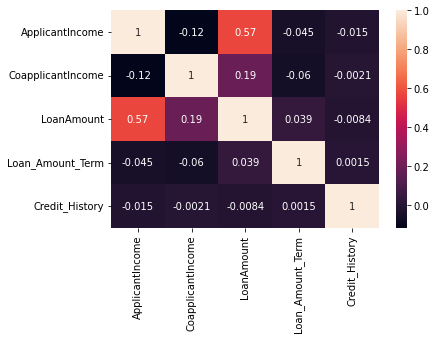

In [15]:
data.corr()
sns.heatmap(data.corr(),annot=True)

#### To understand the correlation present between applicant income and Loan amount we will use scutter plot between the two

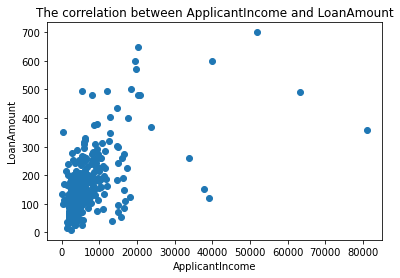

In [16]:
plt.scatter(x='ApplicantIncome',y='LoanAmount',data=data)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('The correlation between ApplicantIncome and LoanAmount')
plt.show()

###
# Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

#### Check the nulls in data

In [17]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Handle categorical missing data
- We replace missing data with mode 

In [18]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

#### Handle numerical missing data
- We replace missing data with median

In [19]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
data.shape

(614, 13)

## Checking the Outliers in some of the numerical attributes
- We are checking the outliers here in four numerical attributes..

<AxesSubplot:>

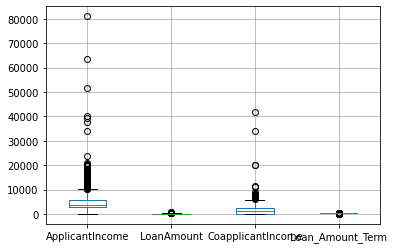

In [22]:
numeric_col = ['ApplicantIncome','LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']
data.boxplot(numeric_col)

##### We notice that there are an outliers in ApplicantIncome and in CoapplicantIncome columns so we are going to replace them with median for both

#### Here we use IQR to detect the outliers and be able to remove them 

In [23]:
for x in ['ApplicantIncome', 'CoapplicantIncome']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [24]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#####
- As we can see, we removed the outliers .. now we must replace these null values with median

In [25]:
data['ApplicantIncome'] = data['ApplicantIncome'].fillna(data['ApplicantIncome'].median())
data['CoapplicantIncome'] = data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].median())

In [26]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
data.shape

(614, 13)

######
#### Now we can say the data is clean .. No outliers, no nulls..

##
# Task 4: creat a model that fits the data

#### Convert the categorical data into numerical data
- Now, we must encode the data which means converting the categorical variables into a numeric form to convert it to a machine-readable form, and this can be done through using LabelEncoder () from Sklearn.preprocessing library, and also using OrdinalEncoder() from Sklearn.preprocessing library also.
- There are a lot of ways to convert the data into numerical data but I will mention these two ways Only.

In [28]:
# Label Encode The Target Variable
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

In [29]:
# Ordinal Encode The features
enc = OrdinalEncoder() 
data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']] = enc.fit_transform(data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


#### Splitting it into dependence and independence variables (Target and Features)

In [30]:
x=data.drop(columns=['Loan_ID','Loan_Status'])
y=data['Loan_Status']

#### Splitting the data into training data and testing data
- I am going to split the data into two parts one for training and and one for testing for each of Target and features

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [32]:
print(x_train.shape)

(429, 11)


In [33]:
print(x_test.shape)

(185, 11)


### Data Scaling
- We need to standardize features by removing the mean and scaling to unit variance using the StandardScalar(). StandardScaler is the industry's go-to algorithm. StandardScaler() standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation

In [34]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression Model
- This is a classification algorithm which uses a logistic function to predict binary outcome (True/False, 0/1, Yes/No) given an independent variable. The aim of this model is to find a relationship between features and probability of particular outcome. The logistic function used is a logit function which is a log of odds in the favor of the event. Logit function develops a shaped curve with the probability estimated like a step function

In [35]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

Logistic Regression accuracy is: 82.70%


### Confusion Matrix
- One common way to evaluate the quality of a model is to create a confusion matrix, which is a 2×2 table that shows the predicted values from the model vs. the actual values from the test dataset.

Confusion Matrix for Logistic Regression :
 [[ 21  30]
 [  2 132]] 



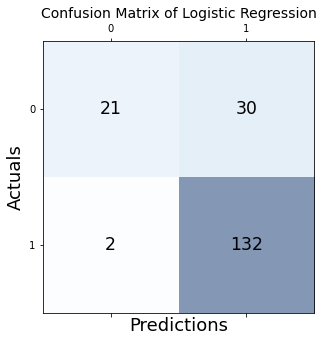

In [36]:
# Confusion Matrix for Logistic Regression  
cm = metrics.confusion_matrix(y_test, predict)
print('Confusion Matrix for Logistic Regression :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=14)
plt.show()

# KNN Model 
- K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g., distance function). Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors. As you increase the number of nearest neighbors, the value of k, accuracy might increase.

#### To find a optimum value of K we plot a graph of error rate vs K value ranging from 0 to 40

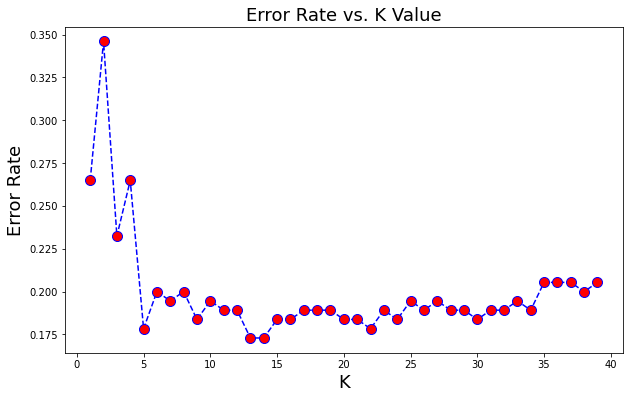

In [37]:
error_rate = []
for i in range(1,40):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(x_train,y_train)
    predict_i = kNN.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=18)
plt.xlabel('K', fontsize=18)
plt.ylabel('Error Rate', fontsize=18)
plt.show()

- From the previous graph will observe that the minimum error rate approximately equal 17 % and this percentage occurs when K value = 13

In [39]:
KNN=KNeighborsClassifier(n_neighbors=13)
KNN.fit(x_train,y_train)
y_preds=KNN.predict(x_test)
print(classification_report(y_test, y_preds))
KNNAcc = accuracy_score(y_preds,y_test)
print('KNN model accuracy is: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

         0.0       0.88      0.43      0.58        51
         1.0       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185

KNN model accuracy is: 82.70%


### Confusion Matrix for KNN

Confusion Matrix for KNN :
 [[ 22  29]
 [  3 131]] 



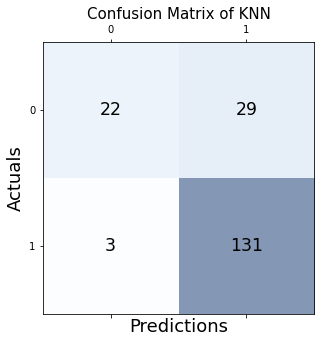

In [40]:
cm = metrics.confusion_matrix(y_test, y_preds)
print('Confusion Matrix for KNN :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN', fontsize=15)
plt.show()

# SVC Model
- Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection. All of these are common tasks in machine learning.You can use them to detect cancerous cells based on millions of images or you can use them to predict future driving routes with a well-fitted regression model.There are specific types of SVMs you can use for particular machine learning problems, like support vector regression (SVR) which is an extension of support vector classification (SVC).A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.Now the training set will be fitted to the SVM classifier. To create the SVM classifier, we will import SVC class from Sklearn.svm library. Below is the code for it:

In [41]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test)
print(classification_report(y_test, predict_svc))
SVCAcc = accuracy_score(predict_svc,y_test)
print('SVC model accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

SVC model accuracy is: 82.70%


- In the above code, we have used kernel='linear', as here we are creating SVM for linearly separable data. However, we can change it for non-linear data. And then we fitted the classifier to the training dataset (train_x, train_y)

### Confusion Matrix for SVC Model

Confusion Matrix for SVC :
 [[ 21  30]
 [  2 132]] 



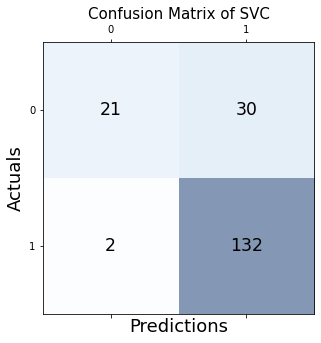

In [42]:
cm = metrics.confusion_matrix(y_test, predict_svc)
print('Confusion Matrix for SVC :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of SVC', fontsize=15)
plt.show()

# ID3 Model
- This is a supervised machine learning algorithm mostly used for classification problems. All features should be discretized in this model, so that the population can be split into two or more homogeneous sets or subsets. This model uses a different algorithm to split a node into two or more sub-nodes. With the creation of more sub-nodes, homogeneity and purity of the nodes increases with respect to the dependent variable.

In [43]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(x_train,y_train)
predict_ID3 = DT.predict(x_test)
print(classification_report(y_test, predict_ID3))
ID3Acc = accuracy_score(predict_svc,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3Acc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

ID3 model accuracy is: 82.70%


- We can see that we used max_depth as our parameter in order to improve our accuracy and prevent any underfitting or overfitting as well as for random_state to control the randomness of the estimator.

### Confusion Matrix for ID3 Model

Confusion Matrix for ID3 :
 [[ 21  30]
 [  2 132]] 



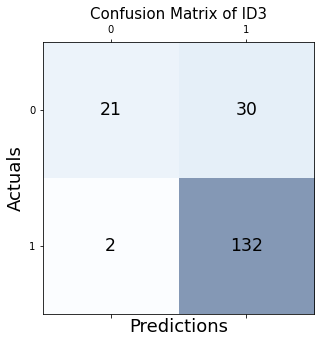

In [44]:
cm = metrics.confusion_matrix(y_test, predict_ID3)
print('Confusion Matrix for ID3 :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of ID3', fontsize=15)
plt.show()

# Random Forest Model
- Random forest is a commonly-used machine learning algorithm, which combines the output of multiple decision trees to reach a single result. - - Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.
- It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
- To more information for Random Forest you can visit: https://www.javatpoint.com/machine-learning-random-forest-algorithm

In [45]:
clf=RandomForestClassifier(n_estimators=800)
clf.fit(x_train,y_train)
y_pred_rf=clf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
rfAcc = accuracy_score(y_pred_rf,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(rfAcc*100))

              precision    recall  f1-score   support

         0.0       0.71      0.43      0.54        51
         1.0       0.81      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.68      0.70       185
weighted avg       0.78      0.79      0.78       185

ID3 model accuracy is: 79.46%


### Confusion Matrix for Random Forest

Confusion Matrix for ID3 :
 [[ 22  29]
 [  9 125]] 



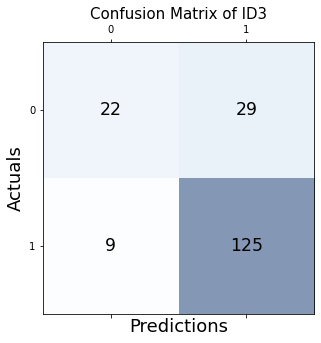

In [46]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix for ID3 :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of ID3', fontsize=15)
plt.show()

#
# Load the Logestic Regresssion Model
- We have two of ways to load a model. Using Joblib and using Pickle. 
- We are going to implement the two ways for explanation.

#### Load Random Forest Model with Joblib

In [47]:
joblib_file = "loan_predition_model_RF"
joblib.dump(clf, joblib_file)
loaded_model = joblib.load(open(joblib_file, 'rb'))
pred_y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, pred_y), 2)
print(result)

0.79


#### Load Logistic Regression model with Pickle

In [48]:
file = "loan_predition_model_LR.pkl"  
pickle.dump(LR, open(file, 'wb'))

loaded_model = pickle.load(open(file, 'rb'))

pred_Y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, predict) ,2)
print(result)

0.83


# Conclusion :
##### From previos code we will notice we've chose Logistic Regression model to load and that because this model make the best prediction as the accuracy of it is the highest. but we are going to load Random Forest either to just comparing the two models (The highest and the lowest).
#### We now done. I hope this simple project will make you feel satisfaction with your hard work during this workshop and I hope I explain every point in this notebook and being a reference for my fellow students.